Project for the course in Microeconometrics | 2021, M.Sc Economics, University of Bonn | Yashaswini Shekhawat

# Replication of David J Deming (2017):



This notebook contains my replication and extension of the Deming (2017) paper:

David J. Deming, The Growing Importance of Social Skills in the Labor Market, The Quarterly Journal of Economics, Volume 132, Issue 4, November 2017, Pages 1593–1640, https://doi.org/10.1093/qje/qjx022

Downloading and viewing this notebook:

The best way to view this notebook is by downloading it and the repository it is located in from GitHub. Other viewing options like MyBinder or NBViewer may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder files on GitHub).

Information about replication and individual contributions:

   - The replication is as close as possible for the selected results to Deming (2017). All tables are named and labeled as they appear in Deming (2017).

   - Sections that have independent contributions by me are marked as extensions and results which are replicated are marked separately as replications.



# Table of Contents

1. [Introduction](#Introduction)
2. [The Model](#The_model)   
   2.1 [The Deming Model](#Deming_model)    
   ..... [Empirical Predictions](#Empirical_preds)  
   2.2 [Extension:An Alternative Model with Collaborative Network](#Extension_model)  
   .....[The setup](#Exten_setup)  
   .....[The wage levels](#Exten_wage)  
3. [Data](#Data)  
   3.1 [The Deming Paper](#Data_deming)  
   .....[O * NET Data](#onet)  
   .....[NLSY79](#nlsy79)  
   .....[NLSY97](#nlsy97)  
   3.2 [Extension: Additional Data](#Data_extension)  
4. [Identification Strategy](#Id_strategy)  
5. [Replication Results](#Repli_results)    
   5.1 [NLSY Results](#nlsy_results)  
   .....[Labor Market Returns to Skills and Complementarity](#lab_market)  
   .....[Occupational Sorting on Skills](#occ_sort)  
   .....[Returns to Skills by Occupation Task Intensity](#occ_task)  
   5.2 [The Growing Importance of Social Skills](#ss_importance)  
   .....[Increasing returns to Social Skills across NLSY Waves](#across_waves)  
6. [Extension: Business Owners and the Self- Employed](#extension_tables)  
   6.1 [Sorting on Skills](#exten_skills)  
   6.2 [Returns to entrepreneurs: scale of business](#exten_scale)  
7. [Conclusion](#conclusion)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sma
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import statsmodels as statsmodels
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS

from auxiliary.replication_tables import *
from auxiliary.extension_tables import *

In [ ]:
df_a= pd.read_stata('data/original1.dta')
df_b= pd.read_stata('data/original2.dta')
df_c= pd.read_stata('data/original3.dta')
df_d= pd.read_stata('data/original4.dta')
df_e= pd.read_stata('data/original5.dta')
df_f=pd.read_stata('data/original6.dta')
df_g= pd.read_stata('data/original7.dta')

df= pd.concat([df_a, df_b, df_c, df_d, df_e, df_f, df_g])

In [3]:
df1_a= pd.read_stata('data/business1.dta')
df1_b= pd.read_stata('data/business2.dta')
df1_c= pd.read_stata('data/business3.dta')

df1= pd.concat([df1_a, df1_b, df1_c])

# 1. Introduction <a id="Introduction"></a>

David Deming (2017) examines the changing structure and the trends in the labor market from the 1990s and the 2000s to explain the evolving role of social skills in the labor market. 
An important idea in the literature on labor economics has been that of skill biased technological change, i.e. explaining increasing returns to skill through the existence of complementarity between skilled labor and technological change. Thus, in the 1990s the labor market was "hollowed out" as technological change substituted routine tasks and complemented skilled labor.
As Deming notes, however, starting in the 2000s, there has been very little growth in high paying and cognitive skill intensive jobs, which begs the question that if technological change is skill biased, why have returns stagnated? Two possible explanations are offered; that there are technological "cycles" which boom and bust and there is currently a slowdown in technological progress, while the other is that the definition of what is considered routine is expanding and so computer capital is substituting for labor even higher up in the skill distribution.

Deming also notes however that the relative decline in high skilled employment in the 2000s has been driven by STEM (science, technology, engineering and mathematics) jobs. STEM jobs shrank by 0.12 percentage points as a share of the U.S. labor force between 2000 and 2012 as opposed to rising by 1.33 percentage points in the previous two decades, while all other cognitive occupations grew by 2.87 percentage points between 2000 and 2012 (against a growth of 1.99 percentage points in the previous decade). He further notes that the fastest growing cognitive occupations- managers, teachers, nurses, lawyers etc. all involve a considerable amount of interpersonal interaction.

In the paper, the author shows that high return jobs increasingly require social skills, which are generally difficult to automate and substitute. Deming presents a model of team production between workers, who perform a variety of tasks on the job, productivity in which is determined by the cognitive skills, while the ability to "trade" tasks with other workers is determined by their social skills. I provide an alternative model, which determines returns to social skills by using the concept of "collaborative networks", where workers have social networks that they utilize to collaborate on tasks and thus, increase their productivity.

The predictions of Deming's model are then investigated using the data from National Longitudinal Survey of Youth 1979 and 1999 (NLSY79 and NLSY99) and the Occupational Information Network (O* NET). 

An important prediction of Deming's model is that workers with high social skills will self select into more non-routine occupations. While Deming carries out this analysis for workers of different occupations, which include freelance workers, no separate analysis is carried out for business owners and self-employed workers or "entreprenuers", occupations which by their very nature are very non-routine. I extend Deming's analysis to explicitly include entrepreneurs and examine how different aspects such as the scale of the enterprise are affected by increased social skills of the owner. 

This notebook proceeds as follows. In Section 2, I present the basic structure of the model presented by the author that lays down the theoretical framework for the paper, in addition to an alternative model I develop. In Section 3, I discuss the data used and in Section 4 I analyze the identification strategy used by the author. Section 5 shows my replication of the results in the paper and in Section 6 I extend Deming's analysis to include business owners and the self-employed. Section 7 offers some concluding remarks.

# 2. The Model <a id="The_model"></a>

## 2.1 The Deming Model <a id="Deming_model"></a>

In this section, I present the structure of Deming's theoretical model and it's predictions that underlie the author's empirical analysis in the paper. I only present the basic setup and structure of the model, details of which can be found in Deming's paper.

Deming extends the standard human capital model of labor supply to incorporate a "task framework":
                                $$ y_j(i)= A_j\alpha_j(i)l_j(i) $$  

where $y_j(i)$ specifies the production function for task i as worker j's cognitive skill $A_j$ times a task productivity parameter $\alpha_j(i)$ times labor supplied to task i. Any job can be separated into an infinite number of discrete tasks that are jointly performed to produce some good. Deming assumes that workers perform a continuum of tasks according to the following:
$$ Y_j= exp[\int_{0}^{1}lny_j(i)di] $$
and that each worker supplies one unit of labor inelastically.

Deming points out that this setup allows two workers with the same level of cognitive ability to differ in terms of productivity over individual tasks, which implies that workers can specialize in performing those tasks over which they have a comparative advantage. Deming's model thus develops from the Ricardian trade framework, where instead of countries producing products over which they have a comparative advantage, workers "trade tasks" for mutual benefit.

He argues that social skills matter because they reduce the costs of task trading with fellow workers. He formalizes this by introducing a depreciation factor $S_{i,n} \in (0,1)$ that is proportionaly applied to any task trade where $S_{i,n}= S_i*S_n$ for $i \neq n$ and each worker can trade costlessly with themselves, i.e. $S_{i,i}=1 \forall  i$. Workers with high social skill therefore pay a lower coordination cost to trade with others, which allows them to earn higher wages by specialzing in the tasks they can perform best and trading their output with others. Workers with high cognitive ability but low social skill will perform an inefficient number of tasks by themselves.

This model is clear on when social skills will matter; if there is a high variance in the task productivity factors, there is greater gain from trading tasks while if there is low variance (in the limiting case $\alpha_j(i)$ takes the same value for all tasks), then there are no gains from trade and only the cognitive ability matters.

Deming considers a competitive market where Y is the only final good, defined as above and labor is the only factor of production. Firms hire pairs of workers and pay market wages equal to $Y_j$ times exogenous output price $P^{*}$. Workers maximize output $Y_j$ and firms maximize profits as total revenue $P^*(Y_1 +Y_2)$ minus wages paid to workers $(w_1 + w_2)$

I now look at the case where Deming characterizes equilibrium with social skills, presenting a brief verbal explanation of the formal argument, which can be found in Deming's paper. With only two workers, worker one will produce tasks on their own rather than trading if worker specific task price in terms of efficiency units of labor if produced on her own is less than the task price if produced by the other worker. This leads to the division of the task interval where certain tasks are performed exclusively by worker 1, others are performed exclusively by worker 2 and the remaining tasks are non-traded.
The equilibrium wages are given by:
$$ w_1= P* A_1^{i^H}(S*A_2\omega)^{1-i^H}exp[\int_0^{i^H} ln\alpha_1(i)di + \int_{i^H}^1 ln\alpha_2(i)di]$$

$$ w_2= P* A_2^{1-i^L}(S*A_1\omega^{-1})^{i^L}exp[\int_0^{i^L} ln\alpha_1(i)di + \int_{i^L}^1 ln\alpha_2(i)di]$$


### 2.1.1 Empirical Predictions <a id="Empirical_preds"></a>

Deming's model generates the following predictions:

1. There exists a positive labor market return to both cognitive and social skill: This is evident from the wage equations, which are increasing in social skill and cognitive ability.

2. Cognitive skill and social skill are complements: This can be seen as the second derivatives of $w_1$ and $w_2$ with respect to A and S* are positive; intuitively, social skills are more valuable when cognitive ability is high because more value can be traded by the worker.

3. Workers with higher social skills sort into non-routine occupations.

4. Workers earn more when they switch into non-routine occupations and their wage gain in relative terms is increasing in social skill.

## 2.2 Extension: An Alternative model with Collaborative Networks <a id="Extension_model"></a>

The model specified by Deming incorporates social skills by using the concept of task trade. However, it is not always intuitive that people can "trade tasks" with others in their jobs, for example it is difficult to imagine physicians, lawyers, teachers etc. trading tasks with others. It is easier to recognize the presence of what I call "collaborative networks", i.e. social networks of workers which they can access to produce better work or perform their jobs better. For example, a lawyer might have a network of other lawyers, whom she can consult for help with a specific case. The same holds true for physicians, economists etc. This is especially clear in customer-oriented jobs where client networks are extremely important and a business owner/ an entrepreneur usually builds and utilizes these client networks to enhance their production. Therefore, I provide below a simple alternative model for returns to social skills using "collaborative networks", inspired by Calvó-Armengol and Jackson's networked model of employment. Although social skills are undoubtedly essential in even the building of social networks, here I consider a case where social skills are used in the effective utilization of existing social networks.

I note here that Deming clarifies his position on the above by stating that instead of considering teamwork in production, one can consider customer-oriented jobs like consulting, health, teaching etc. as a joint production ventures between the workers and the customers. So, the model I provide is just a simple alternative way of looking at the same problem.

### 2.2.1 The setup <a id="Exten_setup"></a>

I utilize the same initial setup as Deming. Good Y is produced by performing a continuum of tasks, i.e.:
$$ Y_j= exp[\int_{0}^{1}lny_j(i)di] $$
and each worker supplies one unit of labor inelastically, i.e.
$$ \int_{0}^{1}l_j(i) di = L_j =1 $$

The tasks performed by workers are also governed by the same equation, i.e.  
$$ y_j(i)= A_j\alpha_j(i)l_j(i) $$  

where $y_j(i)$ specifies the production function for task i as worker j's cognitive skill $A_j$ times a task productivity parameter $\alpha_j(i)$ times labor supplied to task i.

For simplicity, here I consider worker networks that are established within a firm. Assume there are n workers connected by an undirected network, which is represented by an $n \times n$ symmetric matrix G, whose entries are {0,1}. Thus, if an entry $G_{kl}$ is 0, that means that workers k and l are not connected in the network and they are connected if the value is 1. Each worker has a social skill level $S_j$. As social skills increase, the probability that a worker will be able to utilize his network to increase his task productivity rises. Thus, I model $\alpha_j(i)$ as follows:
$$ \alpha_j(i)= \sum_{k=1}^{n}p_j^k(S_j)\beta_j^k(i) $$
where $p_j^k(S_j)$ is the probability that worker j will collaborate with worker k and $\beta_j^k(i)$ is the enhancement in task productivity of worker j by collaborating with worker k. 
$p_j^k(S_j)$ is increasing in $S_j$ and $p_j^k(S_j)$ = 0 if $G_{jk}$ is 0 and $\beta_j^k \geq 0$. Further, a worker always "collaborates" with herself, so $p_j^j(S_j) = 1$

To determine the wage $w_j$ I then follow a similar analysis as in Deming's model. I characterize the wage received by worker j for task i as $p_j(i)$, which is equal to the wage paid to worker j for a unit of labor divided by the quantity of task i that can be produced by worker j with a unit of labor:
$$ p_j(i)= \dfrac{w_j}{A_j\alpha_j(i)} $$

Note that 
$$ \int_{0}^{1}p_j(i)y_j(i)di = \int_{0}^{1}w_jl_j(i)di$$
$$ = w_jL_j $$
Thus, we get 
$$p_j(i)y_j(i)= w_jL_j$$

### 2.2.2 The wage levels <a id="Exten_wage"></a>

Since the output market is assumed to be competitive, the wage $w_j$ is will be specified in terms of output price $P^{*}$. For worker j, the firm maximizes the following equation with respect to $w_j$ :
$$ P^{*}Y_j - w_jL_j$$
$$ P^{*}exp[\int_{0}^{1}lny_j(i)di] - w_j$$
$$ P^{*}exp[\int_{0}^{1}ln\left(\dfrac{w_j}{p_j(i)}\right)di] - w_j$$
$$ P^{*}w_jexp[- \int_{0}^{1}lnp_j(i)di] - w_j$$

The first order condition with respect to $w_j$ gives:
$$ P^{*}exp[- \int_{0}^{1}lnp_j(i)di] = 1$$
$$ P^{*} = exp[\int_{0}^{1}lnp_j(i)di]$$
$$ lnP^{*} = \int_{0}^{1}lnp_j(i)di$$
$$ lnP^{*} = \int_{0}^{1}ln\left(\dfrac{w_j}{A_j\alpha_j(i)}\right)di$$
$$ lnw_j = lnP^* + lnA_j + \int_{0}^{1}ln\alpha_j(i)di$$
$$ w_j = P^*A_j exp[\int_{0}^{1}ln\alpha_j(i)di]$$

Since $w_j$ is increasing in $\alpha_j(i)= \sum_{k=1}^{n}p_j^k(S_j)\beta_j^k(i)$, thus, we can see that increasing social skills leads to an increase in wages through an increase in the probability of collaboration which leads to an increase in task productivity. Additionally, workers with higher social skills will sort into non-routine occupations to take advantage of an increased productivity through collaboration.

# 3. Data <a id="Data"></a>

## 3.1 The Deming Paper <a id="Data_deming"></a>

For the replication, I use the data available for the paper on the Harvard dataverse (Deming, David, 2017, "Replication Data for: "The Growing Importance of Social Skills in the Labor Market"", https://doi.org/10.7910/DVN/CYPKZH, Harvard Dataverse, V1 ) but for clarity, I present the data sources by the author here as well.

### 3.1.1 O * NET Data <a id="onet"></a>

Deming uses the 1998 O * NET data, a survey administered by the U.S. department of Labor to a random sample of U.S. workers in each occupation, to study the task content of work. 
The survey asks questions on abilities and skills required for each occupation as well as the work activies in that occupation. These questions are rated on an ordinal scale and the author converts the score to a 0-10 scale to reflect weighted percentile rank.

Three key indicators of task content are utilized from the dataset. First, an occupation's routine task task intensity is measured as an average of the two questions: (i) "How automated is the job?" and (ii) "How important is repeating the same physical activities or mental activities over and over, to performing this job?"
Second, the three O * NET variables whose average defines non-routine analytical (math) task intensity are: (i) the extent to which an occupation requires mathematical reasoning (ii) whether the occupation uses mathematics to solve problems (iii) whether the occupation requires knowledge of mathematics.
Lastly, social skill intensity is defined as the average of four items: (i) coordination; (ii) negotiation; (iii) persuasion; and (iv) social perceptiveness.

### 3.1.2 NLSY79 <a id="nlsy79"></a>

The main dataset used by the author is the NLSY79, which is a nationally representative sample of youth aged 14 to 22 in 1979. The survey was conducted every year from 1979 to 1993 and then every two years from 1994 to 2012 and includes measures of skills, education, employment, wage etc.
The main outcome variable is real log hourly wage (indexed to 2013 dollars) for respondents above 23 and not in school. Wage values are trimmed below 3 and above 200.

Deming uses respondents' standardized scores on the Armed Forces Qualifying Test (AFQT) to proxy for cognitive skills.
As a measure for social skills, the following four variables are used:
(i) Self-reported sociability in 1981 (extremely shy, somewhat shy, somewhat outgoing, extremely outgoing)
(ii) Self-reported sociability in 1981 at age 6 (retrospective)
(iii) The number of clubs in which the respondent participated in high school
(iv) Participation in high school sports (yes/no)
Each variable is normalized with mean 0 and standard deviation 1, then the avergae of all four variables is taken and restandardized.

In some specifications, the author controls for completed years of education in addition to the AFQT scores. Additionally, a measure of "non-cognitive" skills is constructed by using the normalized average of the Rotter Locus of Control and the Rosenberg Self- Esteem Scale (which is slightly positively correlated with both AFQT and the social skills measure).
Further, information on each respondent's occupation in the NLSY79 is matched to the O * NET codes, and occupation and industry (using census industry codes) fixed effects are controlled for in some specifications.

In [4]:
sum_stats= df.loc[df['sample']==0, :]
summary_stats1(sum_stats)

,Mean,Standard Deviation,Description
educ,13.09,2.54,Years of completed education
wage,17.24,15.18,Hourly wage (2013 level)
soc_nlsy_std,-0.00,1.00,Social Skills measure
afqt_std,-0.04,0.99,AFQT (Cognitive skills measure)
female,0.50,0.50,Female
hisp_female,0.08,0.27,Hispanic Female
hisp_male,0.08,0.27,Hispanc Male
black_male,0.13,0.33,Black Male
black_female,0.12,0.33,Black Female


<b> Extension : Table 1: Summary Statistics for NLSY79 data </b>

### 3.1.3 NLSY97 <a id="nlsy97"></a>

Deming compares the NLSY79 and the NLSY97 data to examine how the returns to social skills have evolved over time.
The NLSY97 is a nationally representative survey of individuals aged 12-16 in 1997. The structure of the survey is largely the same as NLSY97 with a few changes.

The measure for social skills used by the author in the NLSY97 is the standardized average of the two questions for extroversion used in the Big 5 personality test. To maximize comparibilty with NLSY79, in the analysis for changes in return to social skills, only the first two questions from the NLSY79 social skills measure are used. 

Additionally, Deming restricts the sample of ages to 25-33 when comparing NLSY79 and NLSY97, i.e. he compares returns to social skills for individuals of similar ages during 1980s-1990s and 2004-2012.

In [4]:
sum_stats2= df.loc[df['sample']==1, :]
summary_stats2(sum_stats2)

,Mean,Standard Deviation,Description
educ,13.46,2.99,Years of completed education
wage,14.27,15.88,Hourly wage (2013 level)
soc_nlsy2_std,-0.00,1.00,Social Skills measure
afqt_std,0.10,1.01,AFQT (Cognitive skills measure)
female,0.49,0.50,Female
hisp_female,0.10,0.30,Hispanic Female
hisp_male,0.11,0.31,Hispanc Male
black_male,0.13,0.34,Black Male
black_female,0.13,0.34,Black Female


<b> Extension: Table 2: Summary Statistics for NLSY97 </b>

## 3.2 Extension: Additional Data <a id="Data_extension"></a>

I extend Deming's analysis to explicitly include business owners and entrepreneurs by using data from NLSY79 and NLSY97. 

There are some differences in the way the data is collected in the two surveys.
For the NLSY79 dataset, information for business owners is explicitly available but for the latest waves, such as 2010 and 2012.
For the years where data is available, I include two types of variables: (i) Whether the individual is a business owner and (ii) variables that reflect the scale of the enterprise, such as number of employees hired

For the NLSY97 dataset, information is available for all waves but the question asked is not whether the individual is a business owner, but whether the person is self-employed, which potentially includes freelance workers. Again, I include the two types of variables mentioned above.

Since the data is not available for individuals of comparable ages across NLSY79 and NLSY97, I cannot provide any reasonable analysis for the comparision of returns to social skills (for example in terms of enterprise scale) over time, hence the analysis is restricted to examining whether individuals with higher social skills self select into self-employment and to examining whether higher social skills are tied to a larger enterprise scale.  

In [3]:
sum_stats3= df1
summary_stats3(sum_stats3)

,Mean,Standard Deviation,Description
educ,13.79,2.90,Years of completed education
business,0.07,0.26,Business
employees_1,21.28,338.54,Number of employees hired
soc_nlsy2_std,0.03,0.99,Social Skills measure
afqt_std,0.14,0.99,AFQT (Cognitive skills measure)
female,0.49,0.50,Female
hisp_female,0.10,0.30,Hispanic Female
hisp_male,0.11,0.31,Hispanc Male
black_male,0.13,0.33,Black Male
black_female,0.14,0.34,Black Female


<b> Table 3: Summary statistics for extended dataset to include business owners </b>

# 4. Identification Strategy <a id="Id_strategy"></a>

Given the availability of detailed data, the empirical examination of the predictions of Deming's model lends itself to a relativiely simple empirical strategy. The causal graph below represents the causal structure of the problem at hand. 

<img src="files/causal_graph.png" width="600"/>
<b> Figure 1: Causal Graph </b>

Years of education and type of occupation are directly observable. Experience is proxied by age and following many other authors (Neal and Johnson 1996; Altonji, Bharadwaj and Lange 2012), cognitive ability is captured by the AFQT score. Non-cognitive skills are proxied by the Rotter Locus of Control and Rosenberg Self-Esteem scale (as in Heckman, Stixrud and Uruza 2006). 
Similar to Heckman, Stixrud and Uruzua (2006), the equation for each outcome variable (ln(wage) or occupation type) to be estimated is:

$$ Y_i = \beta_{Yi}X_Y + \alpha_{Yi}Cognitive + \gamma_{Yi}Non-cognitive + \delta_{Yi}Social-skills + \epsilon_{Yi} $$
where X includes all control variables like schooling, experience, race, gender etc.

As Heckman, Stixrud and Uruza (2006) point out, schooling is itself an endogenous variable that is affected by ability. Additionally, they also highlight that the cognitive and non-cognitive abilites as measured by the AFQT and the Rotter and Rosenberg scores are affected by years of schooling, creating a reverse causality problem, where higher ability can increase earning and at the same time higher schooling can cause both higher ability scores and higher wages. Thus, a regression is likely to overstate the cognitive and non-cognitive ability coefficients and understate the schooling coefficients.

There are however, two concerns that can be raised here about establishing the causal effect of social skills on the dependent variables discussed.
The first, as Deming highlights, is that it could be that wages are determined by a single underlying ability that is measured by all three skills (social, cognitive, non-cognitive) with error. In that case, the effect of social skills on wages and other outcomes would also be overestimated. But, as shown in Table 1 of the results section, this does not turn out to be the case.
The second is that it could be that there exists some reverse causality between schooling and social skills, just as for cognitve and non-cognitive ability. There is however, a priori no reason to believe that social skills affect or are affected by formal schooling after age (or experience) effects are taken into account.

Hence a least squares regression of the outcome variables on social skills, controlling for all other relevant variables can be used to examine the returns to social skills.

# 5. Replication: Results <a id="Repli_results"></a>

## 5.1 NLSY Results <a id="nlsy_results"></a>

### 5.1.1 Labor Market Returns to Skills and Complementarity <a id="lab_market"></a>

Two predictions of Deming's model are that there is a positive return to skills in the labor market, and that cognitive ability and social skill are complements.
He regresses log hourly wages on both social and cognitive skill, along with the interaction term, controlling for relevant covariates:

$$ ln(wage_{ijt}) = \alpha + \beta_1COG_{i} + \beta_2SS_{i} + \beta_3COG_{i}*SS_{i} + \gamma X_{ijt} + \delta_j + \zeta_t + \epsilon_{ijt} $$

The baseline model includes controls for race-gender indicators, region and urbanicity, age (indexed by j) and year (indexed by t) fixed effects and standard errors are clustered at the individual level. The results are in Table 1.

In [3]:
replication_table1(df)

,(1),(2),(3),(4),(5),(6),(7)
afqt_std,,0.206***,0.206***,0.189***,0.126***,0.190***,0.126***
,,(0.007),(0.007),(0.007),(0.008),(0.007),(0.008)
soc_nlsy_std,0.107***,0.055***,0.049***,0.043***,0.029***,0.044***,0.029***
,(0.006),(0.006),(0.006),(0.006),(0.006),(0.006),(0.006)
afqt_socnlsy,,,0.019***,0.019***,0.011*,0.017***,0.010*
,,,(0.006),(0.006),(0.006),(0.006),(0.006)
noncog_std,,,,0.048***,0.040***,0.046***,0.040***
,,,,(0.006),(0.006),(0.006),(0.006)
afqt_noncog,,,,,,0.008,0.001
,,,,,,(0.006),(0.006)


<b> Table 1: Labor market returns to Cognitive and Social skill in the NLSY79 </b>

<i> Notes: </i> Standard errors are reported in brackets. $^{***}$ p <.01, $^{**}$ p <.05, $^{*}$ p<.10

In the above Table 1, column (1) shows that the return to social skills is positive and statistically significant, i.e. a one standard deviation increase in social skills (soc_nlsy_std) increases real log hourly wages by 10.7%. Column (2) adds the AFQT measure for cognitive skill (afqt_std). 
Column (3) examines the complementarity between social skills and cognitive ability. The interaction term (afqt_socnlsy) is positive and statistically significant. Column (4) adds controls for non-cognitive skills (noncog_std) and column (5) controls for years of completed education.

As pointed out in the identification strategy section, one concern is that cognitive skill and social skill and non-cogitive skill measure the same underlying ability. This is tested in column (6) by adding an interaction term between cognitive and non-cognitive skill (afqt_noncog). If the above concern is true then all interaction terms should be positive. Yet column (6) shows that the interaction term is not statistically significant and drops to 0 after controlling for education in column (7).

### 5.1.2 Occupational Sorting on Skills <a id="occ_sort"></a>

The next prediction examined is that workers with a higher level of social skill will sort into non-routine and social skill intensive occupations. The author estimates:

$$ Taskcontent_{ijt} = \alpha + \beta_1COG_{i} + \beta_2SS_{i} + \beta_3COG_{i}*SS_{i} + \gamma X_{ijt} + \delta_j + \zeta_t + \epsilon_{ijt} $$

where Task content is measured using O * NET data (refer to the data section). The baseline model is identical to the one in section 5.1.1, with additional controls for years of completed education and industry fixed effects. The results are in Table 2.

In [4]:
replication_table2(df)

,Routine,Routine,Social Skills,Social Skills
,(1),(2),(3),(4)
afqt_std,-0.055*,0.161***,0.345***,-0.044**
,(0.030),(0.032),(0.028),(0.019)
soc_nlsy_std,-0.188***,-0.149***,0.208***,0.119***
,(0.022),(0.024),(0.020),(0.014)
afqt_socnlsy,-0.058***,-0.054**,0.014,0.013
,(0.021),(0.023),(0.019),(0.014)
R-squared,0.204,0.237,0.305,0.668
R-squared Adj.,0.203,0.236,0.304,0.668
No. of observations,133599,133599,133599,133599


<b> Table 2: Occupational Sorting on Skills in the NLSY79 </b>

<i> Notes: </i> Standard errors are reported in brackets. $^{***}$ p <.01, $^{**}$ p <.05, $^{*}$ p<.10

Column (1) shows that one standard deviation increase in social skills (soc_nlsy_std) reduces routine task intensity of occupation by 1.88 percentiles (which is highly statistically significant). Column (2) adds controls for math task intensity and other cognitive task measures. We see that conditional on overall cognitive intensity, workers in routine occupations have higher cognitive skill (afqt_std) and lower social skills. This and the negative coefficient on the interaction term (afqt_socnlsy) implies that workers with high cognitive and low social skills sort into routine occupations.

Columns (3) and (4) estimate the same specifications as (1) and (2) but with social skill intensity as the dependent variable. Thus, the empirical prediction that workers with higher social skills sort into non-routine and social skill intensive occupations is confirmed.

### 5.1.3 Returns to Skills by Occupation Task Intensity <a id="occ_task"></a>

Measuring how returns to skills change with occupation switching is difficult as workers sort into occupations where their skills are better rewarded (from Table 2). However, as Deming points out, assuming labor market frictions exist which prevent workers from perfectly sorting into appropriate occupations, one can estimate how returns to skills change as the same worker switches occupations.

Deming's model predicts that workers will earn more when they switch into non-routine and social skill intensive occupations and that the wage gain will be increasing in social skill.
He estimates:

$$ ln(wage_{ijt}) = \beta_1COG_{i}*T_{ijt} + \beta_2SS_{i}*T_{ijt} + \beta_3COG_{i}*SS_{i}*T_{ijt} + \gamma X_{ijt} + \eta_i + \delta_j + \zeta_t + \epsilon_{ijt} $$

where $ T_{ijt} $ indexes the task content of a worker's occupation (main effect included in $X_{ijt}$), $\eta_i$ is a worker fixed effect and rest of the terms are as defined in section 5.1.1. It's important to note that with worker fixed effects only the interactions between skills and $T_{ijt}$ are identified and not returns to skills.
The results are in Table 3.

In [5]:
replication_table3(df)

,Outcome: log hourly wages,(1),(2),(3)
0,Routine task intensity,0.0136,,0.0212
1,,0.0000,,0.0000
2,Cognitive * Routine task intensity,-0.0034,,0.0005
3,,0.0060,,0.7108
4,Social skills * Routine task intensity,-0.0025,,-0.0008
5,,0.0458,,0.5818
6,Cognitive * Social * Routine task intensity,-0.0008,,-0.0011
7,,0.5198,,0.4414
8,Social skill task intensity,,0.0039,0.0176
9,,,0.0035,0.0000


<b> Table 3: Returns to Skills by Occupation Task Intensity in NLSY79. </b>

<i> Notes: </i> The p-values are reported beneath each coefficient

Column (1) shows that workers earn significantly high wages if they sort into routine occupations and that wage return from sorting into routine occupations is decreasing in social skills, as predicted by the model. Column (2) replaces routine with social skill task intensity. Workers switching to a job 10 percentiles higher in social skill according to the O * NET measure earn about 3.9% higher wages and the wage gain is significantly increasing in her social skills (from the interaction term between social skills and social task intensity).
Column (3) includes both routine and non-routine terms. The interactions between skills and routine task intensity become approximately 0 while the coefficients of skills and social task intensity remain statistically significant.

## 5.2 The Growing Importance of Social Skills <a id="ss_importance"></a>

In this section, I present the main result of this section and one of the main results of the paper, i.e. growing importance of social skills in the labor market.

Deming finds that the labor input of routine tasks has declined from the 1980 levels and the non-routine analytical (math) tasks stopped growing and declined slightly after 2000, whereas social skill tasks grew by 24% from 1980 to 2012 (compared to a growth of 11% for non-routine analytical tasks). Moreover, social skills task inputs steadily grew at about 2% through the 2000s. 
Disaggregating this further, the author finds that relative to 1980, jobs with high math and high social skill intensity grew by around 7.2 percentage points as a share of the U.S. labor force from 1980-2012. Low math and high social skills jobs grew by 4.6 percentage points, while the employment share of high math but low social skills jobs shrank by around 3.3 percentage points from 1980 to 2012.

Therefore, clearly the evidence suggests that jobs requiring social skills have experienced strong employment growth since 1980.

### 5.2.1 Increasing returns to Social Skills across NLSY Waves <a id="across_waves"></a>

Deming studies the changes in returns to skills across the NLSY waves (1979 and 1999) by restricting the age range for both the datasets to 25-33. The social skills measure is also altered to have maximum comparibility (refer the Data section).
Deming estimates:

$$ y_{ijt} = \alpha + \sum_{s=1}^{S}[\beta_sSKILL_{i} + \gamma_s(SKILL_{i}*NLSY97_{i})] + \zeta X_{ijt} + \delta_j + \zeta_t + \epsilon_{ijt} $$

The skill vector includes cognitive skills, social skills and in some specifications non-cognitive ability as well. The interaction between skills and the NLSY97 indicator allows to directly test for the hypothesis that returns to skills have changed over time. $X_{ijt}$ also includes an indicator variable for whether the respondent is in NLSY97 or not, apart from the standard controls. $y_{ijt}$ is either an indicator for full-time employment or log real hourly wage conditional on employment.
The results are in Table 4.

In [3]:
replication_table4(df)

,Variables,Full time employment (1),Full time employment (2),Full time employment (3),Log hourly wage (4),Log hourly wage (5),Log hourly wage (6)
0,"Cognitive skills (AQT, standardized)",0.068,0.042,0.039,0.203,0.128,0.115
1,,0.000,0.000,0.000,0.000,0.000,0.000
2,Cognitive skills * NLSY97,0.008,0.006,0.009,-0.051,-0.060,-0.044
3,,0.077,0.204,0.049,0.000,0.000,0.000
4,Social skills (standardized),0.006,0.005,0.004,0.019,0.015,0.011
5,,0.008,0.038,0.085,0.000,0.001,0.014
6,Social skills * NLSY97,0.023,0.021,0.019,0.018,0.019,0.016
7,,0.000,0.000,0.000,0.034,0.018,0.055
8,Cognitive * Social,-0.007,-0.006,-0.007,0.007,0.004,0.002
9,,0.010,0.018,0.012,0.134,0.407,0.594


<b> Table 4: Returns to Skills in NLSY79 vs NLSY97. </b>

<i> Notes: </i> The p-values are reported beneath each coefficient

Column (1) shows that one standard deviation increase in cognitive ability increases the probability of full time employment by 6.8 percentage points, but the interaction term with NLSY97 is not statistically significant at the 5% level, which implies that returns to cognitive skills have not changed much over time. On the other hand, a one standard deviation increase in social skills is associated with only about 0.6 percentage point increase in employment probability in NLSY79 vs a 3 percentage point increase in NLSY97. Column (2) adds controls for years of completed education, while column (3) adds non-cognitive skills controls.

Columns (4)- (6) examine the impact of skills on changes in wage returns. Note that changes in returns to cognitive skills have declined slightly over time. Column (4) implies that one standard deviation increase in cognitive ability increased wages by 20.3% in NLSY 79 vs an increase of about 15% in NLSY97. For social skills however, column (4) implies that one standard deviation increase led to a wage gain of about 2% in NLSY79 vs a wage gain of 3.7% in NLSY97. Columns (5) and (6) add controls for years of completed education and non-cognitive skills respectively.

# 6. Extension: Business Owners and the Self- Employed <a id="extension_tables"></a>

While there are many theories of entrepreneurship and self-employment, from the Schumpeterian view of an entrepreneur as a harbinger of change and innovation to Knight's view of an entrepreneur as a bearer of costs of uncertainty, to Baumol's extension of Schumpeterian typology to productive, unproductive and destructive entrepreneurship; there can be no doubt about the fact that business owners and entrepreneurs must perform a wide variety of tasks such as financing (the scale of which is apparent by the number of financing products available in the markets from venture capital to small business loans), hiring workers, establishing client networks etc. Even those self-employed people who work as freelancers need to organize, manage and advertise their operation, although the scale might be smaller when compared to business owners.

In this section, I extend Deming's analysis of workers sorting into non-routine occupations to explicitly look at business owners and the self-employed, which are, by their very nature, extremely non-routine occupations.
As a reminder, I look at both NLSY79 and NLSY97 datasets for this analysis, although there are some differences in the way the data was collected in the two surveys (refer to the data section).

## 6.1 Sorting on Skills <a id="exten_skills"></a>

One of the main predictions of Deming's model was that workers with high social skills will sort into non-routine occupations which require high social skills. For the reasons mentioned above, I test this hypothesis for business owners and the self-employed using the following estimation equation:

$$ Business_{ijt} = \alpha + \beta_1COG_{i} + \beta_2SS_{i} + \beta_3COG_{i}*SS_{i} + \gamma X_{ijt} + \delta_j + \zeta_t + \epsilon_{ijt} $$

where $Business_{ijt}$ is an indicator variable for whether the person is self-employed or owns a business conditional on full-time employment. The baseline model is again identical to the one in section 5.1.1, with additional controls for years of completed education. The results are presented in Table 5.

In [8]:
extension_table1(df1)

,Outcome: Business Ownership,NLSY79,NLSY97
0,"Cognitive skills (AQT, standardized)",0.024,0.000
1,,0.000,0.926
2,Social skills (standardized),0.018,0.009
3,,0.000,0.001
4,Cognitive * Social,0.004,-0.002
5,,0.265,0.451
6,Observations,7200.0,39652.0


<b> Table 5: Sorting on skills into business ownership and self-employment. </b>

<i> Notes: </i> The p-values are reported beneath each coefficient

For NLSY79, both social and cognitive skill are statistically significant, implying that a one standard deviation increase in cognitive skill leads to a 2.4 percentage points increase in the probability of owning a business and a one standard deviation increase in social skill leads to a 1.8 percentage points increase in the probability of owning a business.

For NLSY97, there is almost no impact of cognitive skills on probability of self-employment while a one standard deviation increase in social skill leads to a 0.9 percentage points increase in the probability of owning a business.

It is important here to again take note of the fact that differences in data collection strategy and the years for which the data was available makes a comparison of the two results impossible. One, in the NLSY79 dataset, the question posed was whether the person was a business owner while in the NLSY97 dataset the question was whether the individual was self-employed, which potentially includes freelance workers who are not business owners. 
Secondly, a very important caveat is that the data for NLSY79 was only available from 2010, making the individuals in the NLSY79 dataset over 40 years of age at the time of survey while those in the NLSY97 belong to a much younger age group.

The inclusion of all kinds of self-employed people and not just business owners could potentially explain the difference in returns to both cognitive and social skill, but more importantly, the mean age of those in the NLSY79 sample is 49 while the mean age of those in the NLSY97 is 24, which suggests that those in the NLSY97 sample would have only just entered the labor market with which large labor market frictions are associated, specifically for entrepreneurs and the self-employed.

Even without a comparison of changes over time however, we can conclude that Deming's prediction holds up in this case as well, as individuals with high social skills sort into non-routine occupations such as business ownership.

## 6.2 Returns to entrepreneurs: scale of business <a id="exten_scale"></a>

Deming's model predicts that there is a positive return to social skills in the labor market. While the wage return is clearly the most important return for all workers; for business owners and entrepreneurs, the success and scale of their enterprise could be viewed as a closely related "return".
There could be a number of ways of examining how successful a business is; measures like revenue generated, locations of a business, number of workers hired are all potential indicators of the scale and success of a business. 

In this section, I examine the returns of social skills to the scale of a business by looking at the number of workers hired by a business owner. 

I provide a few plots below from the NLSY97 and the NLSY79 data to get a visual representation of the returns to social skills in terms of number of workers hired

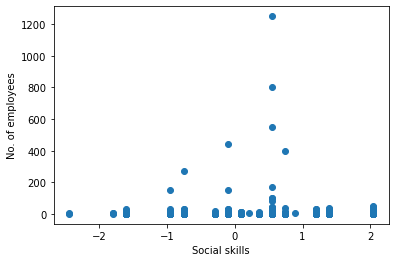

In [13]:
dfA= df1.loc[(df1['sample']==0), :]
plt.scatter(dfA['soc_nlsy2_std'], dfA['employees_1'])
plt.xlabel("Social skills")
plt.ylabel("No. of employees")
plt.show()

<b> Figure 1: Relationship between social skills and number of employees for NLSY79 </b>

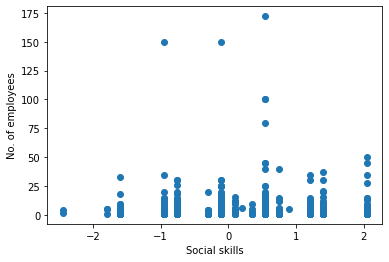

In [21]:
dfA= df1.loc[(df1['sample']==0) & (df1['employees_1'] < 200), :]
plt.scatter(dfA['soc_nlsy2_std'], dfA['employees_1'])
plt.xlabel("Social skills")
plt.ylabel("No. of employees")
plt.show()

<b> Figure 2: Relationship between social skills and number of employees for NLSY79 </b>

<i> Notes: </i> Outlier observations (number of employees $\geq$ 200) removed

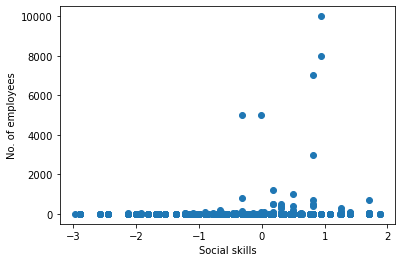

In [16]:
dfB= df1.loc[(df1['sample']==1), :]
plt.scatter(dfB['soc_nlsy2_std'], dfB['employees_1'])
plt.xlabel("Social skills")
plt.ylabel("No. of employees")
plt.show()

<b> Figure 3: Relationship between social skills and number of employees for NLSY97 </b>

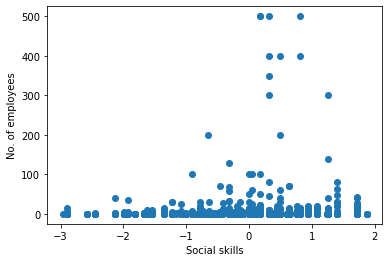

In [20]:
dfB= df1.loc[(df1['sample']==1) & (df1['employees_1'] < 600), :]
plt.scatter(dfB['soc_nlsy2_std'], dfB['employees_1'])
plt.xlabel("Social skills")
plt.ylabel("No. of employees")
plt.show()

<b> Figure 4: Relationship between social skills and number of employees for NLSY97 </b>

<i> Notes: </i> Outlier observations (number of employees $\geq$ 600) removed

From the graphs, it seems that there is a positive relationship between social skills and the number of employees, specifically for NLSY97.
I estimate the following equation, as in section 5.1.1:

$$ Employees_{ijt} = \alpha + \beta_1COG_{i} + \beta_2SS_{i} + \beta_3COG_{i}*SS_{i} + \gamma X_{ijt} + \delta_j + \zeta_t + \epsilon_{ijt} $$

Again, the model is identical to the one in section 5.1.1. The results are presented in Table 6.

In [22]:
extension_table2(df1)

,Outcome: No. of employees,NLSY79,NLSY97
0,"Cognitive skills (AQT, standardized)",-2.531,9.856
1,,0.239,0.291
2,Social skills (standardized),1.131,11.774
3,,0.447,0.067
4,Cognitive * Social,-2.633,7.711
5,,0.159,0.127
6,Observations,754.0,1766.0


<b> Table 6: Returns to social skills to the scale of the business. </b>

<i> Notes: </i> The p-values are reported beneath each coefficient

The results from table 6 show that there is again a divergence in the results obtained from the two datasets. For NLSY97, a one standard deviation increase in social skills increases the scale of business in terms of employees hired by around 12 employees. The p-value of the coefficient is close to 5% and is significant at the 10% level, while the coefficient of social skills for NLSY79 is insignificant.

Again, this apparent divergence in the results is difficult to explain without additional data, given the differences in the datasets. One conjecture might be that given the age differences in the two samples, the older business owners (from the NLSY79 dataset) have had a lot more time to establish their business, so returns to social skill have faded out, while for younger entrepreneurs starting out, the returns to social skill are more potent in terms of establishing the scale of their business. While intuitive on some level, this is just a conjecture; comparison of the results from the two datasets cannot be done without the availability of more data.

That being said, I find that the results here are mixed; there is possibly a positive impact of social skills on the scale of a business as measured by number of employees, as evidenced by the NLSY97 results, but the result is not fully convincing given the lack of data.

# 7. Conclusion <a id="conclusion"></a>

This notebook presented the findings of David Deming's 2017 paper on the growing importance of social skills in the labor market and also extended Deming's analysis in a few ways. 

I replicated four major results of Deming's paper, and presented the structure for his theoretical model.
Apart from the replication, I developed an alternative theoretical model to understand returns to social skills through the use of social networks that are utilized by workers to enhance their task specific productivity. I also presented Deming's identification strategy in the notebook.
Further, I presented empirical findings on the role of social skills in the occupational sorting of individuals into self-employed and non self-employed, along with presenting results for impact of social skills on the scale of a business.
Inclusion of additional data which ensures comparability across the NLSY surveys can lead to stronger results for these extensions.

Undoubtedly, the evidence from Deming's paper is substantive to argue for the case of increasing importance of social skills over time and my extensions have only buttressed Deming's findings. Further research on the role of how social skills evolve and develop can shed more light on the subject at hand.

# References

* Calvó-Armengol, Antoni, and Matthew O. Jackson. "Networks in labor markets: Wage and employment dynamics and inequality." Journal of economic theory 132.1 (2007): 27-46.
* Neal, Derek A., and William R. Johnson. "The role of premarket factors in black-white wage differences." Journal of political Economy 104.5 (1996): 869-895.
* Altonji, Joseph G., Prashant Bharadwaj, and Fabian Lange. "Changes in the characteristics of American youth: Implications for adult outcomes." Journal of Labor Economics 30.4 (2012): 783-828.
* Heckman, James J., Jora Stixrud, and Sergio Urzua. "The effects of cognitive and noncognitive abilities on labor market outcomes and social behavior." Journal of Labor economics 24.3 (2006): 411-482.
* Schumpeter, Joseph A. "Change and the Entrepreneur." Essays of JA Schumpeter 4.23 (1934): 45-91.
* Baumol, William J, 1990. "Entrepreneurship: Productive, Unproductive, and Destructive.” Journal of Political Economy, University of Chicago Press, vol. 98(5), pages 893-921, October.